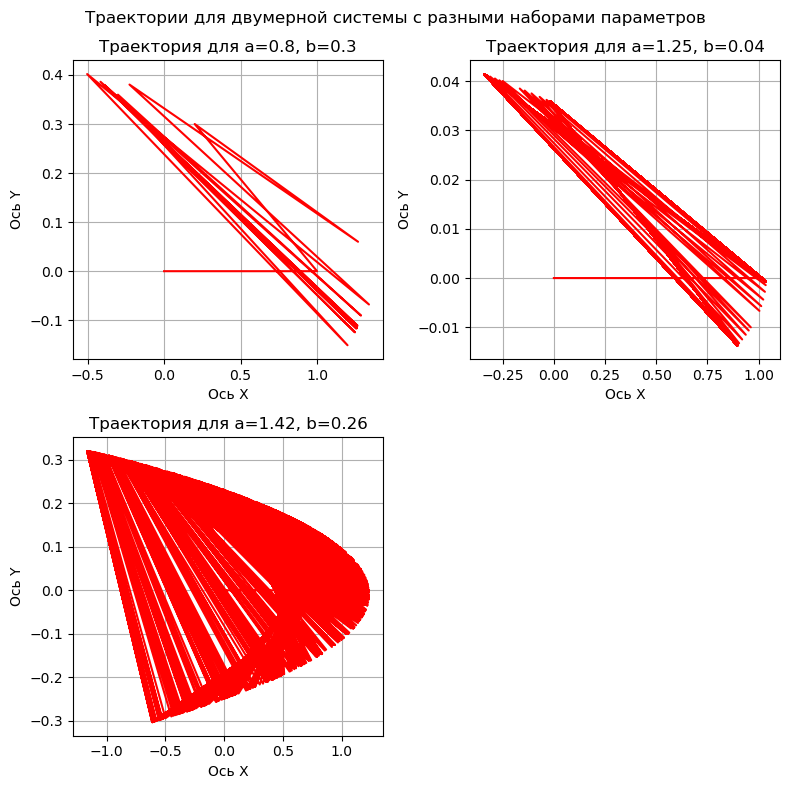

In [76]:
import matplotlib.pyplot as plt

# Подсчет координаты следующей точки
def next_point_2d(x, y, a, b):
    x_next = 1 - a*x**2 + y
    y_next = b*x
    return x_next, y_next

# Заданные параметры
a = [0.8, 1.25, 1.42]
b = [0.3, 0.04, 0.26]

# Задаем размер графика и название
figure, axis = plt.subplots(2, 2, figsize=(8,8))
figure.suptitle("Траектории для двумерной системы с разными наборами параметров")

# Стартовые положения точек
initial_conditions =  [(0, 0), (0, 0), (0, 0)]

# Подсчитываем траектории
for index, (a, b, ax) in enumerate(zip(a, b, axis.flat)):
    x, y = initial_conditions[index]
    x_values, y_values = [x], [y]

    # Рисуем траекторию точки
    for j in range(1000):
        x_next_2d, y_next_2d = next_point_2d(x_values[len(x_values) - 1], y_values[len(y_values) - 1], a, b)
        x_values.append(x_next_2d)
        y_values.append(y_next_2d)

    # Отображаем траекторию
    ax.plot(x_values, y_values, color="red")
    ax.set_title(f"Траектория для a={a}, b={b}")
    ax.set_xlabel("Ось X")
    ax.set_ylabel("Ось Y")
    ax.grid(True)
    
# Убираем пустой 4ый график
axis[1, 1].axis("off") 

# Выводим графики
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

# Наблюдается закономерность: вторая точка всегда (1, 0), поэтому рисуется линия (0,0) -> (1,0), затем точки расположены по параболе сверху и снизу,
# поэтому закрашивается область внутри параболы,

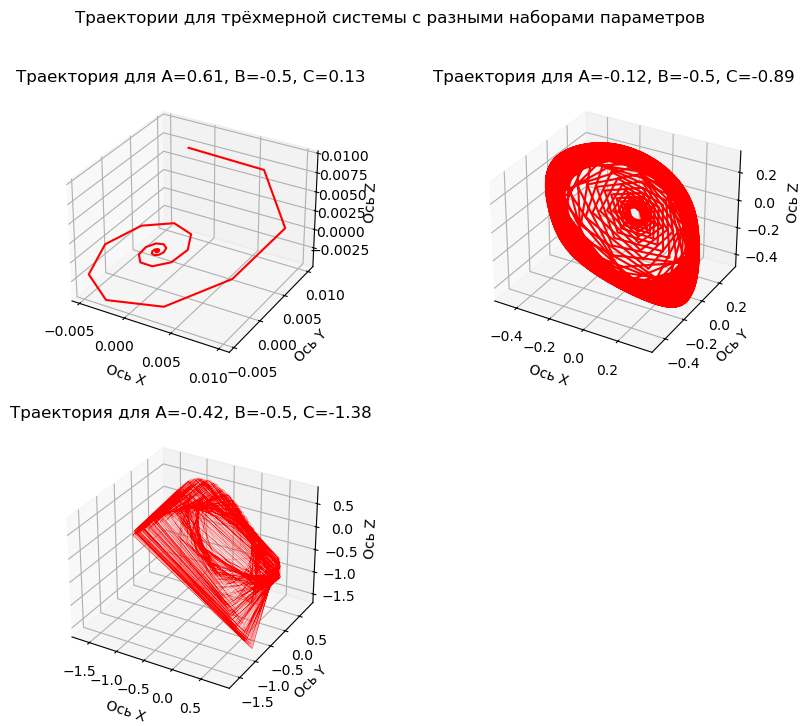

In [281]:
from mpl_toolkits.mplot3d import Axes3D

def next_point_3d(x, y, z, a, b, c):
    x_next = y
    y_next = z
    z_next = b*x + c*y + a*z - y**2
    return x_next, y_next, z_next

# Заданные параметры
A = [0.61, -0.12, -0.42]
B = [-0.5, -0.5, -0.5]
C = [0.13, -0.89, -1.38]

initial_positions = [(0, 0.006, 0.01), (0.001, 0.0001, 0.04), (0.1, 0.1, 0.1)]

figure = plt.figure(figsize=(10, 8))
figure.suptitle("Траектории для трёхмерной системы с разными наборами параметров")

for index, (a, b, c) in enumerate(zip(A, B, C)):
    ax = figure.add_subplot(2, 2, index + 1, projection="3d")
    x, y, z = initial_positions[index]
    x_values, y_values, z_values = [x], [y], [z]

    # Рисуем траекторию точки
    for j in range(1000):
        x_next_3d, y_next_3d, z_next_3d = next_point_3d(x_values[len(x_values) - 1], y_values[len(y_values) - 1], z_values[len(z_values) - 1], a, b, c)
        x_values.append(x_next_3d)
        y_values.append(y_next_3d)
        z_values.append(z_next_3d)
        
    # Отображаем траекторию
    if (index == 2):
        ax.plot3D(x_values, y_values, z_values, color="red", lw=0.1)
    else:
        ax.plot3D(x_values, y_values, z_values, color="red")
    ax.set_title(f"Траектория для A={a}, B={b}, C={c}")
    ax.set_xlabel("Ось X")
    ax.set_ylabel("Ось Y")
    ax.set_zlabel("Ось Z")

# Выводим графики
plt.show()

# Закономерность: все графики образуют спираль (воронку)

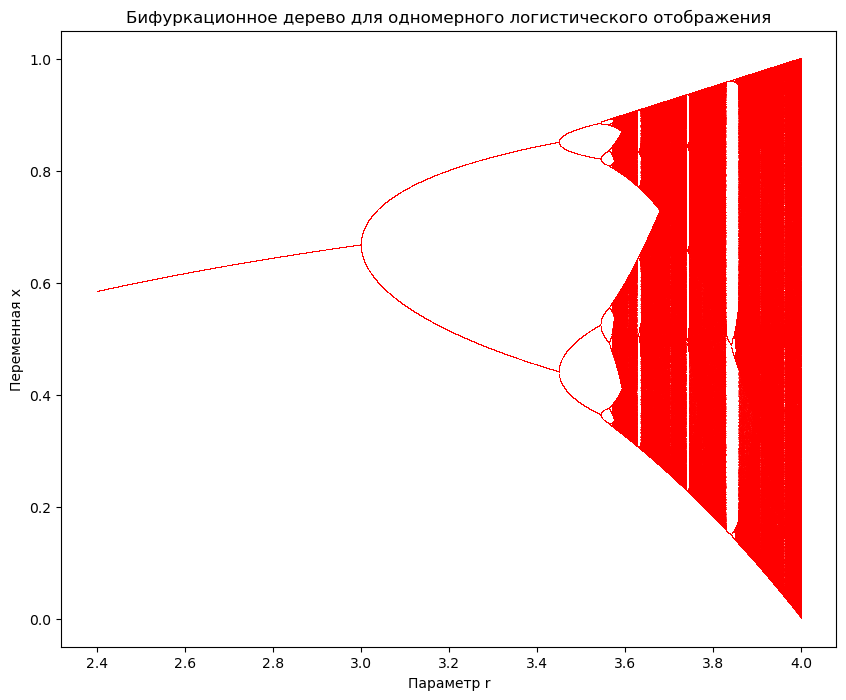

In [283]:
import numpy as np

# Параметры для построения
R_interval = np.linspace(2.4, 4.0, 10000) # Параметр r от 2.4 до 4.0
iterations = 10000                        # Кол-во итераций
last = 1000                               # 1000 последних точек будем отображать
x_initial = np.random.random()            # начальное значение любое число от 0 до 1

# Массивы для хранения значений r и x для построения графика
r_values, x_values = [], [] 

# Подсчитываем r и x в соответствии с логичстическим отображением
for r in R_interval:
    x = x_initial
    for i in range(iterations):
        x = x * r *(1 - x) # Логистическое отображение
        # Сохраняем последние значения после достижения устойчивого состояния
        if (i >= iterations - last):
            r_values.append(r)
            x_values.append(x)
            
# Построение графика
plt.figure(figsize=(10, 8))   
plt.plot(r_plot, x_plot, ',r', alpha=0.5)  # Используем маленькие точки для плотности
plt.title("Бифуркационное дерево для одномерного логистического отображения")
plt.xlabel("Параметр r")
plt.ylabel("Переменная x")
plt.show()           